# Домашнее задание №3

Выполнил: Хайкин Г.А., БЭК1812

Данные: Росстат, 2011 год


Загрузим необходимые библиотеки:

In [2]:
library("readxl") # чтение excel-файла
library("tidyverse") # коллекция пакетов: ggplot2, dplyr, etc.
library("knitr") # создание отчётов
library("lmtest") # тесты для линейных моделей
library("memisc") # сравнение моделей
library("pander") # таблички в markdown
library("psych") # описательные статистики
library("modelr") # добавление прогнозов/остатков
library("MASS") # тест Бокса-Кокса
library("remotes") # тест Рамсея
library("car") # vif()
library("sandwich") # гетероскедастичность
library("caret")
library("nortest") 
library("stats")
library("visreg") 


# Отрегулируем размер картинок
library("repr")
options(repr.plot.width=10, repr.plot.height=8)

### 1. Подготовка данных

Выгрузим данные из заранее подготовленного эксель-файла.

In [3]:
df <- read_excel("data_new.xlsx")
head(df)

Regions,Unemployment,GRP_RUB,Consumer_Basket,GRP_per_capita,Urban_Share,Higher_Education,West,GRP_Percentage,GRP_Change,Unemployment_2010,Unemployment_2011,Unemployment_Change,Crime,Crime_Rate,Top20_Natural_Resources
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Белгородская область,4.4,331010.0,86,384895.3,66.4,28.6,1,111.0,11.0,5.2,4.4,-0.8,1036,0.01036,1
Брянская область,7.1,137187.1,87,157686.3,69.2,24.1,1,108.2,8.2,8.0,7.1,-0.9,1533,0.01533,0
Владимирская область,5.8,181842.6,97,187466.6,77.6,23.3,1,102.9,2.9,6.2,5.8,-0.4,1659,0.01659,0
Воронежская область,6.6,203575.5,98,207730.1,65.9,27.0,1,111.4,11.4,7.5,6.6,-0.9,1158,0.01158,0
Ивановская область,6.6,121945.5,92,132549.5,81.0,26.2,1,100.6,0.6,7.6,6.6,-1.0,1628,0.01628,0
Калужская область,5.6,232722.0,90,258580.0,75.9,24.9,1,112.9,12.9,6.5,5.6,-0.9,1496,0.01496,0


In [4]:
tail(df)

Regions,Unemployment,GRP_RUB,Consumer_Basket,GRP_per_capita,Urban_Share,Higher_Education,West,GRP_Percentage,GRP_Change,Unemployment_2010,Unemployment_2011,Unemployment_Change,Crime,Crime_Rate,Top20_Natural_Resources
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Хабаровский край,6.8,297609.2,133,223766.3,81.5,31.8,0,102.5,2.5,9.1,6.8,-2.3,2048,0.02048,1
Амурская область,6.1,273175.8,115,237544.2,67.0,26.1,0,108.1,8.1,6.9,6.1,-0.8,2193,0.02193,0
Магаданская область,4.5,464112.9,148,313589.8,95.7,31.3,0,102.4,2.4,5.7,4.5,-1.2,2071,0.02071,1
Сахалинская область,8.2,1210003.9,146,828769.8,80.3,23.6,0,104.3,4.3,9.3,8.2,-1.1,2021,0.02021,0
Еврейская автономная область,8.8,225065.5,118,190733.5,68.1,18.8,0,104.8,4.8,9.4,8.8,-0.6,2121,0.02121,0
Чукотский автономный округ,5.4,883368.7,176,501914.0,66.0,27.7,0,95.8,-4.2,4.1,5.4,1.3,1437,0.01437,1


Удалим далее ненужные столбцы:

In [5]:
df <- subset(df, select = -c(GRP_RUB, Consumer_Basket, GRP_Percentage, Unemployment_2010, Unemployment_2011))

Обозначим наши переменные. 
* Зависимая переменная: 
    * `Unemployment` — уровень безработицы (%).

* Объясняющие переменные:
    * `GRP_per_capita` — валовой региональный продукт на душу населения с учетом паритета покупательной способности;
    * `Urban_Share` — удельный вес городского населения;
    * `Higher_Education` — доля занятого населения, имеющего высшее образование;
    * `West` — дамми-переменная, принимающая 1 для западный регионов и 0 для восточных.
    * `Crime_Rate` — доля количества преступленний на 100 000 человек.
    * `Top20_Natural_Resources` — дамми-переменная, принимающая 1 для регионов, входящих в [топ-20](https://raex-rr.com/country/region_potential/rating_of_regions_by_resources_potential) по объему природных ресурсов, и 0 — для остальных.

Создадим новый датафрейм.

In [6]:
new_df <- subset(df, select = c(Unemployment, GRP_per_capita, Urban_Share, Higher_Education, 
                                West, Crime_Rate, Top20_Natural_Resources))

### 2. Дискриптивные статистики и диаграммы рассеяния

a) Найдем дискриптивные статистики.



In [8]:
library("pastecs")

In [9]:
stat.desc(new_df)

,Unemployment,GRP_per_capita,Urban_Share,Higher_Education,West,Crime_Rate,Top20_Natural_Resources
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,83.0000000,8.300000e+01,83.0000000,83.0000000,83.00000000,8.300000e+01,83.00000000
nbr.null,0.0000000,0.000000e+00,0.0000000,0.0000000,27.00000000,0.000000e+00,63.00000000
nbr.na,0.0000000,0.000000e+00,0.0000000,0.0000000,0.00000000,0.000000e+00,0.00000000
min,1.4000000,4.314612e+04,28.7000000,12.5000000,0.00000000,3.300000e-03,0.00000000
max,48.8000000,2.415795e+06,100.0000000,47.6000000,1.00000000,2.764000e-02,1.00000000
range,47.4000000,2.372649e+06,71.3000000,35.1000000,1.00000000,2.434000e-02,1.00000000
sum,677.9000000,2.384720e+07,5786.0000000,2243.1000000,56.00000000,1.375100e+00,20.00000000
median,7.0000000,2.213870e+05,70.6000000,26.2000000,1.00000000,1.628000e-02,0.00000000
mean,8.1674699,2.873157e+05,69.7108434,27.0253012,0.67469880,1.656747e-02,0.24096386


b) Построим диаграммы рассеяния зависимой переменной от всех независимых.

Нас, соответственно, будет интересовать в представленной матрице SPLOM последняя сторка, где по горизонтали находится зависимая переменая, а по вертикали — независимая. 

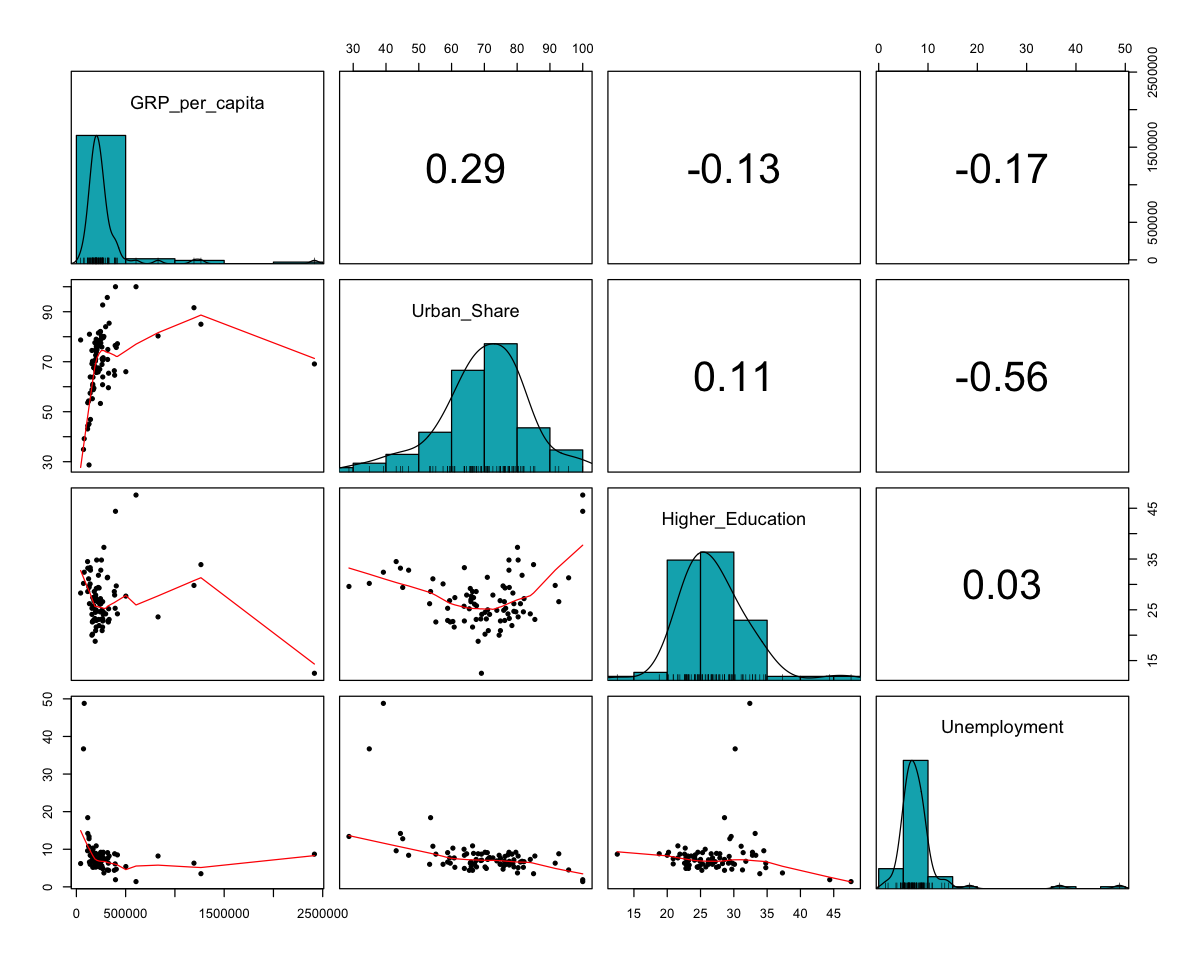

In [10]:
pairs.panels(subset(df, select = c(GRP_per_capita, Urban_Share, Higher_Education, Unemployment)), 
            method = "pearson", # correlation method
            hist.col = "#00AFBB",
            density = TRUE,  # show density plots
            ellipses = FALSE # show correlation ellipses
            )

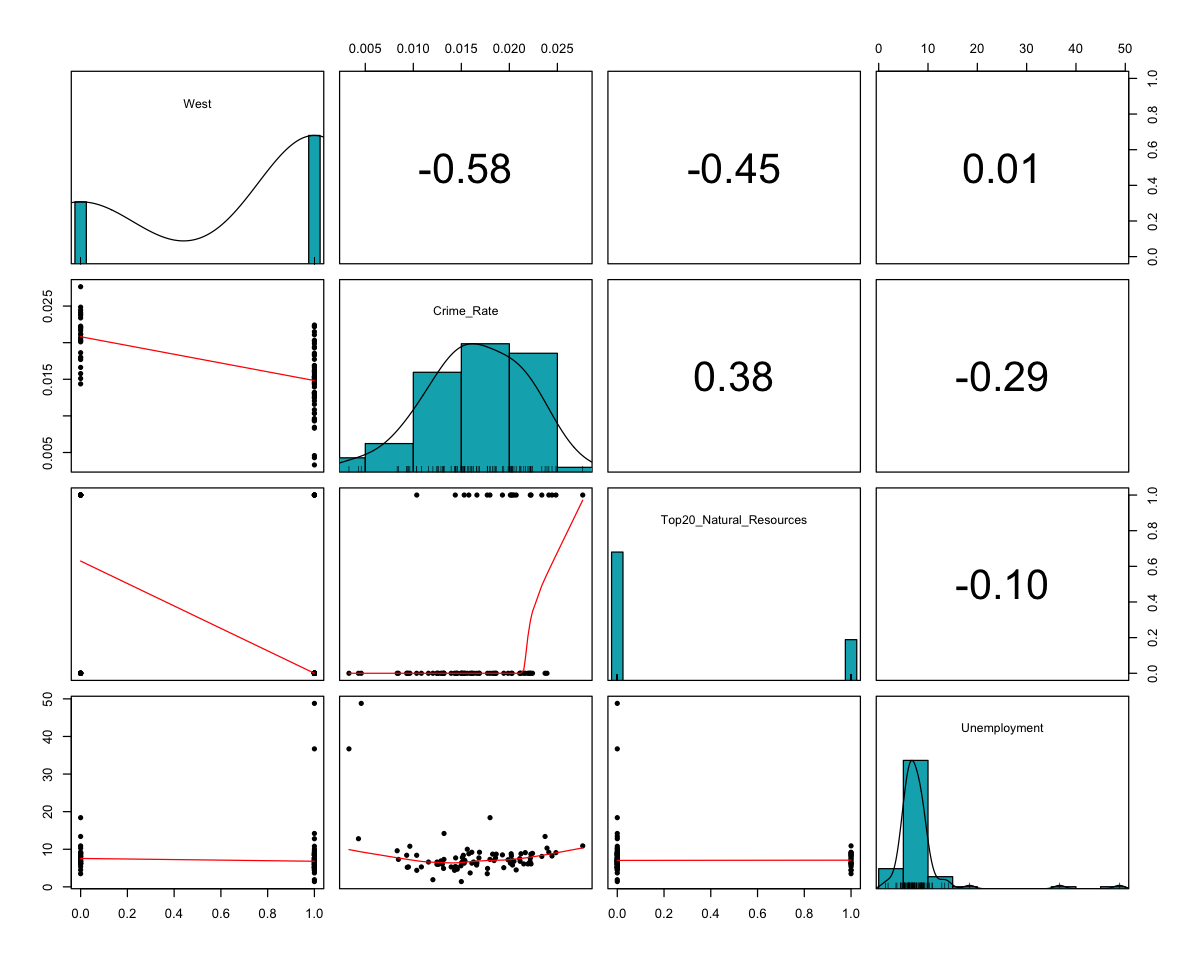

In [15]:
pairs.panels(subset(df, select = c(West, Crime_Rate, Top20_Natural_Resources, Unemployment)), 
            method = "pearson", # correlation method
            hist.col = "#00AFBB",
            density = TRUE,  # show density plots
            ellipses = FALSE # show correlation ellipses
            )

Графики здесь не подписаны, поскольку

1) Реализация подписей в матрице SPLOM достаточно сложна, да и не имеет смысла, ибо по своей структуре матрицы зависимость переменных четко видна.

2) Строить 6 диаграмм рассеяний с подписями достаточно некомпактно.

Надеюсь, что уважаемый проверяющий примет это во внимание и не будет за это снимать баллы :)

### 3. Линейная регрессия

Оценим следующую линейную регрессию:

$$
\text{Unemployment}_i = \beta_0 + \beta_1 \text{GRP_per_capita}_i + \beta_2 \text{Urban_Share}_i + \beta_3 \text{Higher_Education}_i + \beta_4 \text{Crime_Rate}_i + \delta_0 \text{West}_i  + \delta_1 \text{Top20_Natural_Resources}_i + \varepsilon_i
$$

In [11]:
lr <- lm(Unemployment ~ GRP_per_capita + Urban_Share + Higher_Education + Crime_Rate + West + Top20_Natural_Resources,
         data = new_df)

In [12]:
summary(lr)


Call:
lm(formula = Unemployment ~ GRP_per_capita + Urban_Share + Higher_Education + 
    Crime_Rate + West + Top20_Natural_Resources, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.365 -2.346 -0.170  1.570 31.202 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.827e+01  5.296e+00   5.339 9.40e-07 ***
GRP_per_capita          -2.404e-07  1.996e-06  -0.120    0.904    
Urban_Share             -2.436e-01  5.205e-02  -4.681 1.22e-05 ***
Higher_Education         4.709e-02  1.235e-01   0.381    0.704    
Crime_Rate              -2.067e+02  1.687e+02  -1.225    0.224    
West                    -1.685e+00  1.633e+00  -1.031    0.306    
Top20_Natural_Resources  9.785e-01  1.538e+00   0.636    0.527    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.115 on 76 degrees of freedom
Multiple R-squared:  0.3457,	Adjusted R-squared:  0.294 
F-statistic: 6.692 on 6 and 76 DF,  p-

Получили

$$
\widehat{\text{Unemployment}}_i = 28.27 - 0.2436 \times \text{Urban_Share}_i
$$

Как видим, только свободный коэффициент и коэффициент при факторе `Urban_Share` являются статистически значимыми при любом разумном уровне значимости. Заметим, что по 𝐹-статистике модель адекватна при любом разумном уровне значимости, а скорректированое качество подгонки регрессии $𝑅^2_{𝑎𝑑𝑗}$ составляет $0.294$.

Сохраним остатки регрессии:

In [13]:
lr_res <- residuals(lr)

### 4. Гетероскедастичность

Пусть линейная регрессия имеет вид $y = X\beta + \varepsilon$.

Дабы для такой модели по МНК были найдены BLUE-оценки, необходимо выполнение условий теоремы Гаусса-Маркова. Одним из таких условий является соблюдение гомоскедастичности ошибок:

$\mathbb{Var}(\varepsilon) = \sigma^2_{\varepsilon}I_{n\times n}$, где $n$ — количество наблюдений в нашей выборке.

Однако, на практике часто имеет место гетероскедастичность ошибок:

$\mathbb{Var}(\varepsilon) = \begin{pmatrix}
\sigma ^{2}_{1} & 0 & \dotsc  & 0\\
0 & \sigma ^{2}_{2} & \dotsc  & 0\\
\vdots  & \vdots  & \ddots  & \vdots \\
0 & 0 & \dotsc  & \sigma ^{2}_{n}
\end{pmatrix}$

Следовательно, будем проверять следующую гипотезу: 

$
\begin{cases}
H_0: \text{гомоскедастичность} \\
H_a: \text{гетероскедастичность}
\end{cases}
$

#### Тест Бройша-Пагана

$
\begin{cases}
H_0: \sigma_i^{2} = \sigma_{\varepsilon}^2  \  \ \forall i =\overline{1, n} \\
H_a: \sigma_i^{2} \sim f(\alpha_0 + \alpha_1Z_{1i} + ... + \alpha_rZ_{ri}) \  \text{для некоторых скрытых переменных}~Z_{1}, ... , Z_{r}, \ i =\overline{1, n}
\end{cases}
$

В данном тесте предполагается любой вид функциональной зависимости стандартного отклонения ошибок от $f$.

In [14]:
bptest(lr, studentize = FALSE) 


	Breusch-Pagan test

data:  lr
BP = 191.74, df = 6, p-value < 2.2e-16


Гипотеза о гомоскедастичности ошибок отвергается при любом разумном уровне значимости.

#### Тест Уайта

В тесте вид гетероскедастичности не конкретизируется.

Оцениваем вспомогательную регрессию квадратов остатков на исходные регрессоры, их квадраты и константу. Попарные произведения регрессоров включать не будем — что позволительно, — поскольку данный тест придется прописывать вручную, ибо в R он не реализован.

$e^2 = \beta_0 + \sum\limits_{i=1}^{k}\beta_ix_i + \sum\limits_{i=1}^{k}\gamma_i x^2_i + \varepsilon$

In [15]:
lr_e_sq <- lm(lr_res^2 ~ 1 + GRP_per_capita + Urban_Share + Higher_Education + Crime_Rate + West + 
              Top20_Natural_Resources + I(GRP_per_capita^2) + I(Urban_Share^2) + I(Higher_Education^2) + 
              I(Crime_Rate^2), data=new_df)

Рассчитаем тестовую статистику:

$
\chi^2_{obs} = nR^2_{e} \stackrel{H_0}{\sim}  \chi^2(m -1)$, где $m$ — число оцениваемых в вспомогательной регресии коэффициентов.

In [16]:
R_sq = summary(lr_e_sq)$r.squared
chi_obs = nrow(new_df) * R_sq

In [17]:
m = 11

In [18]:
alpha <- c(0.1, 0.05, 0.01)
chi_crit <- qchisq(1 - alpha, df=m-1)

for (i in 1:3) {
    if (chi_obs < chi_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 отвергается при уровне значимости 0.10
H_0 отвергается при уровне значимости 0.05
H_0 отвергается при уровне значимости 0.01


Гипотеза о гомоскедастичности ошибок отвергается при любом разумном уровне значимости.

Поскольку гетероскедастичность была выявлена при двух широких тестах — Бройша-Пагана и Уайта, — воспользуемся более узкими тестами.

#### Тест Голдфелда-Квандта

$
\begin{cases}
H_0: \sigma_i^{2} = \sigma_{\varepsilon}^2  \  \ \forall i =\overline{1, n} \\ 
H_a: \sigma_i^{2} \sim X_{ji}, \ i =\overline{1, n}
\end{cases}
$

Данный тест зависит от того, какой вид гетероскедастичности мы предполагаем.

Пусть $\sigma_i^{2} \sim \text{GRP_per_capita}_{i}$.

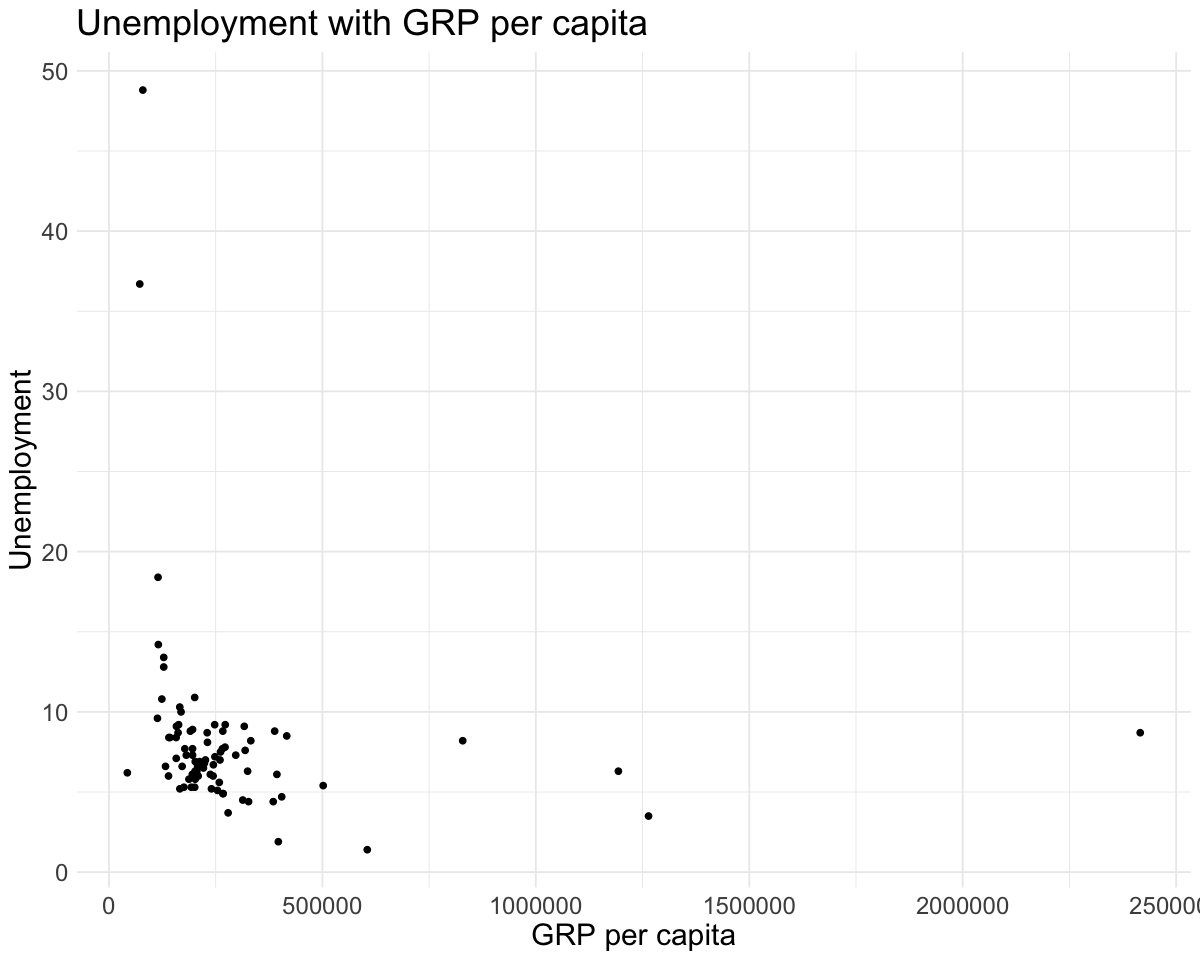

In [19]:
ggplot(new_df, aes(GRP_per_capita, Unemployment)) +
    geom_point() + 
    labs(
    x = "GRP per capita",
    y = "Unemployment",
    color = ""
    ) +
    theme_minimal() + 
    ggtitle("Unemployment with GRP per capita") + 
    theme(text = element_text(size=18))

Очевидно, посредством метода пристального взгляда можно сказать: имеет место гетероскедастичность. Однако, проведем тест.

Упорядочим наши данные.

In [20]:
df_test <- new_df[order(new_df$GRP_per_capita),]

In [21]:
head(df_test)

Unemployment,GRP_per_capita,Urban_Share,Higher_Education,West,Crime_Rate,Top20_Natural_Resources
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.2,43146.12,78.7,28.3,0,0.02205,0
36.7,72280.11,34.9,30.2,1,0.00330,0
48.8,79462.12,39.2,32.4,1,0.00458,0
9.6,113694.84,43.1,34.5,1,0.00832,0
18.4,115082.98,53.6,28.6,0,0.01799,0
14.2,115765.00,44.4,33.2,1,0.01320,0


In [22]:
tail(df_test)

Unemployment,GRP_per_capita,Urban_Share,Higher_Education,West,Crime_Rate,Top20_Natural_Resources
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.4,501914.0,66.0,27.7,0,0.01437,1
1.4,605179.6,100.0,47.6,1,0.01500,0
8.2,828769.8,80.3,23.6,0,0.02021,0
6.3,1193409.1,91.6,29.8,0,0.02011,1
3.5,1264098.1,85.0,33.9,0,0.01770,1
8.7,2415795.5,69.1,12.5,1,0.01826,0


Поделим на три части.

In [23]:
df_1 <- df_test[1:31,]
df_2 <- df_test[53:83,]

Оценим регрессии по данным выборкам.

In [24]:
lr_1 <- lm(Unemployment ~ GRP_per_capita + Urban_Share + Higher_Education + Crime_Rate + West + Top20_Natural_Resources,
         data = df_1)
RSS_1 <- sum(residuals(lr_1)^2)

In [25]:
lr_2 <- lm(Unemployment ~ GRP_per_capita + Urban_Share + Higher_Education + Crime_Rate + West + Top20_Natural_Resources,
         data = df_2)
RSS_2 <- sum(residuals(lr_2)^2)

Тестовая статистика:

$F_{obs} = \dfrac{RSS_2/(n_2 - p)}{RSS_1/(n_1 - p)} \stackrel{H_0}{\sim} F(n_2 - p, n_1 - p)$, где $p$ — количество оцениваемых коэффициентов

In [26]:
f_obs =  (RSS_2 / (nrow(df_2) - 7)) / (RSS_1 / (nrow(df_1) - 7))

In [27]:
alpha <- c(0.1, 0.05, 0.01)
f_crit <- qf(1 - alpha, df1 = nrow(df_2) - 7, df2 = nrow(df_1) - 7)

for (i in 1:3) {
    if (f_obs < f_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 не отвергается при уровне значимости 0.10
H_0 не отвергается при уровне значимости 0.05
H_0 не отвергается при уровне значимости 0.01


Как видим, гипотеза о гомоскедастичности не отвергается при любом разумном уровне значимости.

Почему? Это обуславливается тем, что мы неправильно задали вид гетероскедастичности, — это существенный недостаток данного теста: он очень узкий.

Если мы предположим, что $\sigma_i^{2} \sim \dfrac{1}{\text{GRP_per_capita}_{i}}$, то тогда гетероскедастичность будет выявлена.

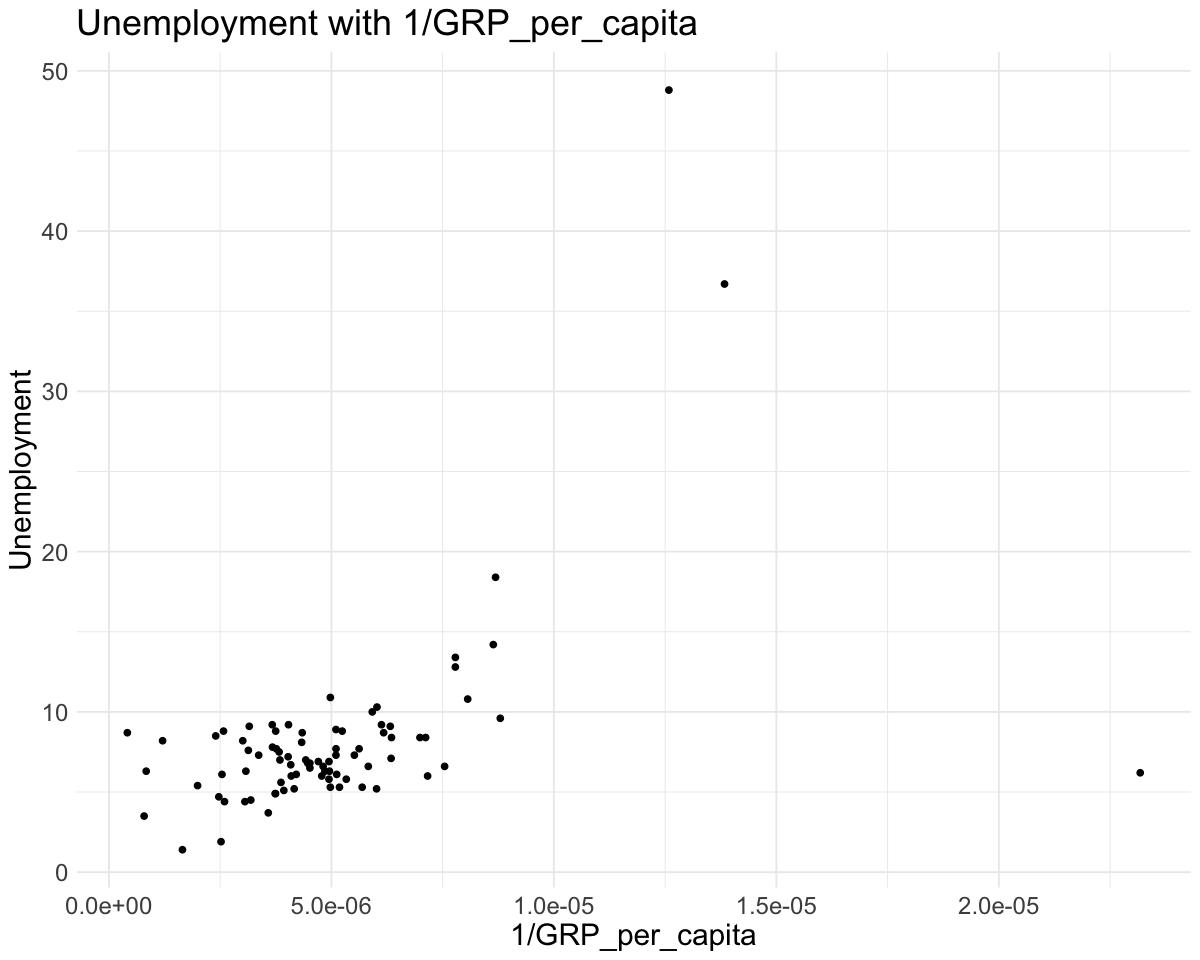

In [35]:
ggplot(new_df, aes(I(GRP_per_capita^-1), Unemployment)) +
    geom_point() + 
    labs(
    x = "1/GRP_per_capita",
    y = "Unemployment",
    color = ""
    ) +
    theme_minimal() + 
    ggtitle("Unemployment with 1/GRP_per_capita") + 
    theme(text = element_text(size=18))

In [36]:
f_obs = (RSS_1 / (nrow(df_1) - 7)) / (RSS_2 / (nrow(df_2) - 7)) 

alpha <- c(0.1, 0.05, 0.01)
f_crit <- qf(1 - alpha, df1 = nrow(df_2) - 7, df2 = nrow(df_1) - 7)

for (i in 1:3) {
    if (f_obs < f_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 отвергается при уровне значимости 0.10
H_0 отвергается при уровне значимости 0.05
H_0 отвергается при уровне значимости 0.01


Гипотеза о гомоскедастичности отвергается при любом разумном уровне значимости.

#### Тест Глейзера

Воспользуемся данным тестом, поскольку он решает недостаток теста Голдфелда-Квандта. Его идея зиждется на том, что дисперсия ошибок не обязательно должна быть пропроциональной какому-либо регрессору, ибо может существовать иной вид зависимости. 

Тест Глейзера проверяет следующее:

$
\begin{cases}
H_0: \sigma_i^{2} = \sigma_{\varepsilon}^2  \  \ \forall i =\overline{1, n} \\ 
H_a: \sigma_i^{2} \sim X^{\gamma}_{ji}, \ i =\overline{1, n}
\end{cases}
$

Этот тест предполагает три вида возможных зависимостей: 

$\gamma = \{1, \frac{1}{2}, -1\}$.

Пусть также как и в тесте Голдфелда-Квандта $X_{ji} = \text{GRP_per_capita}_{i}$.

Оценим три вспомогательные регрессии:

$ (1) \  |e| = \alpha + \beta X_j + \varepsilon$ 

$ (2) \  |e| = \alpha + \beta \sqrt{X_j} + \varepsilon$ 

$ (3) \  |e| = \alpha + \beta \dfrac{1}{X_j} + \varepsilon$ 

Если коэффициент $\beta$ окажется значим хотя бы у одной вспомогательной регрессии, имеет место гетероскедастичность.

In [37]:
lr_help_1 <- lm(abs(lr_res) ~ GRP_per_capita, data=new_df)
summary(lr_help_1)


Call:
lm(formula = abs(lr_res) ~ GRP_per_capita, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9443 -1.8526 -0.9806  0.6186 28.0972 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.190e+00  6.046e-01   5.276 1.08e-06 ***
GRP_per_capita -1.067e-06  1.451e-06  -0.735    0.464    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.99 on 81 degrees of freedom
Multiple R-squared:  0.006631,	Adjusted R-squared:  -0.005633 
F-statistic: 0.5407 on 1 and 81 DF,  p-value: 0.4643


In [38]:
lr_help_2 <- lm(abs(lr_res) ~ I(sqrt(GRP_per_capita)), data=new_df)
summary(lr_help_2)


Call:
lm(formula = abs(lr_res) ~ I(sqrt(GRP_per_capita)), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5402 -1.8350 -0.9867  0.9550 27.5750 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.574169   1.262673   3.623 0.000507 ***
I(sqrt(GRP_per_capita)) -0.003359   0.002356  -1.426 0.157706    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.954 on 81 degrees of freedom
Multiple R-squared:  0.02449,	Adjusted R-squared:  0.01245 
F-statistic: 2.034 on 1 and 81 DF,  p-value: 0.1577


In [39]:
lr_help_3 <- lm(abs(lr_res) ~ I(1/GRP_per_capita), data=new_df)
summary(lr_help_3)


Call:
lm(formula = abs(lr_res) ~ I(1/GRP_per_capita), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0405  -1.6647  -0.5807   0.9837  24.7810 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)         5.338e-01  8.042e-01   0.664  0.50872   
I(1/GRP_per_capita) 4.678e+05  1.376e+05   3.399  0.00105 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.746 on 81 degrees of freedom
Multiple R-squared:  0.1248,	Adjusted R-squared:  0.114 
F-statistic: 11.56 on 1 and 81 DF,  p-value: 0.001051


Как видим, коэффициент наклона оказывается статистически значимым для вспомогательной регресии третьего типа. Значит, нулевая гипотеза о гомоскедастичности отвергается.

### 5. Коррекция гетероскедастичности

Все наши тесты говорят об одном — наличии гетероскедастичности ошибок. 

Это означает, что наши МНК-оценки не являются эффективными:

$\widehat{\mathbb{Var}}(\hat\beta) \neq \hat\sigma^2_{\varepsilon}(X^{T}X)^{-1} = \dfrac{RSS}{n-p}(X^{T}X)^{-1}$.

Устраним гетероскедастичность: будем использовать оценки стандартных отклонений в форме Уайта, которые имеют вид

$\widehat{\mathbb{Var}}(\hat\beta)  = n \mathbb{Var}(\hat\beta) = \left(\dfrac{1}{n}X^{T}X\right)^{-1} \left(\dfrac{1}{n} \sum\limits_{s=1}^{n}e^2_s x^{T}_s x_s\right) \left(\dfrac{1}{n}X^{T}X\right)^{-1}$, где $x_s$— $s$-я строка матрицы $X$.

Однако, стоит отметить, что, на самом деле, если тесты выявили гетероскедастичность, то не всегда нужно бороться с ней, поскольку могут существовать [теоретические обоснования существования гетероскедастичности](https://cran.r-project.org/web/packages/sandwich/vignettes/sandwich.pdf). 


Оценки Уайта:

In [40]:
vcovHC(lr)

,(Intercept),GRP_per_capita,Urban_Share,Higher_Education,Crime_Rate,West,Top20_Natural_Resources
(Intercept),6.833782e+01,3.474456e-06,-5.724338e-01,2.690448e-01,-1.795174e+03,-5.711589e+00,4.652097e+00
GRP_per_capita,3.474456e-06,1.058472e-11,-7.021810e-08,-8.438022e-08,4.938291e-05,8.429401e-07,-1.188366e-06
Urban_Share,-5.724338e-01,-7.021810e-08,6.657433e-03,-4.732652e-03,1.219280e+01,3.183048e-02,-3.539827e-02
Higher_Education,2.690448e-01,-8.438022e-08,-4.732652e-03,8.714961e-03,-6.989497e+00,-2.838524e-02,3.577489e-02
Crime_Rate,-1.795174e+03,4.938291e-05,1.219280e+01,-6.989497e+00,5.677777e+04,1.742323e+02,-1.693129e+02
West,-5.711589e+00,8.429401e-07,3.183048e-02,-2.838524e-02,1.742323e+02,1.401828e+00,-4.723534e-02
Top20_Natural_Resources,4.652097e+00,-1.188366e-06,-3.539827e-02,3.577489e-02,-1.693129e+02,-4.723534e-02,1.758754e+00


Оценим значимость коэффициентов регрессии, используя робастную ковариционную матрицу:

In [41]:
coeftest(lr, vcov=vcovHC(lr))


t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)   
(Intercept)              2.8273e+01  8.2667e+00  3.4201 0.001010 **
GRP_per_capita          -2.4038e-07  3.2534e-06 -0.0739 0.941295   
Urban_Share             -2.4363e-01  8.1593e-02 -2.9859 0.003803 **
Higher_Education         4.7087e-02  9.3354e-02  0.5044 0.615448   
Crime_Rate              -2.0669e+02  2.3828e+02 -0.8674 0.388433   
West                    -1.6846e+00  1.1840e+00 -1.4228 0.158873   
Top20_Natural_Resources  9.7850e-01  1.3262e+00  0.7378 0.462889   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


При гетерокседаксичности же мы в пункте 3 получили:

In [42]:
summary(lr)


Call:
lm(formula = Unemployment ~ GRP_per_capita + Urban_Share + Higher_Education + 
    Crime_Rate + West + Top20_Natural_Resources, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.365 -2.346 -0.170  1.570 31.202 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.827e+01  5.296e+00   5.339 9.40e-07 ***
GRP_per_capita          -2.404e-07  1.996e-06  -0.120    0.904    
Urban_Share             -2.436e-01  5.205e-02  -4.681 1.22e-05 ***
Higher_Education         4.709e-02  1.235e-01   0.381    0.704    
Crime_Rate              -2.067e+02  1.687e+02  -1.225    0.224    
West                    -1.685e+00  1.633e+00  -1.031    0.306    
Top20_Natural_Resources  9.785e-01  1.538e+00   0.636    0.527    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.115 on 76 degrees of freedom
Multiple R-squared:  0.3457,	Adjusted R-squared:  0.294 
F-statistic: 6.692 on 6 and 76 DF,  p-

Как видим, для двух моделей по-разному считаются t-тесты.